# Tutorial 4, Question 1: stochastic gradient descent

In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt

In [2]:
lr = 0.05
num_epochs = 5000

seed = 10
np.random.seed(seed)

In [3]:
# training data
X = torch.tensor(np.array([[1.0, 3.0], [-2.0, -2.0]]))
Y = torch.tensor(np.array([[0.0, 1.0], [1.0, 0.0]]))

print('x: %s, y: %s'%(X.numpy(), Y.numpy()))

x: [[ 1.  3.]
 [-2. -2.]], y: [[0. 1.]
 [1. 0.]]


In [4]:
V_init = [[1.0, 1.0], [0, -2]]
c_init = [-2.0, 3.0]
W_init = [[1.0, 2.0],[-2.0, 0]]
b_init = [3.0, -1.0]

In [5]:
class Two_Layer_DNN():
  def __init__(self):
    self.V = torch.tensor(V_init, dtype=torch.double)
    self.c = torch.tensor(c_init, dtype=torch.double)
    self.W = torch.tensor(W_init, dtype=torch.double)
    self.b = torch.tensor(b_init, dtype=torch.double)

  def __call__(self, x):
    z = torch.inner(torch.transpose(self.W, 0, 1), x) + self.b
    h = torch.sigmoid(z)
    u = torch.inner(torch.transpose(self.V, 0, 1), h) + self.c
    y = torch.sigmoid(u)
    return z, h, u, y

In [6]:
def loss(targets, outputs):
    return torch.mean(torch.square(targets - outputs))

In [7]:
def train(model, inputs, d, learning_rate):
    z, h, u, y = model(inputs)
    dy = y*(1-y)
    grad_u = -(d - y)*dy

    grad_V = torch.outer(h, grad_u)
    grad_c = grad_u

    dh = h*(1-h)
    grad_z = torch.inner(model.V, grad_u)*dh

    grad_W = torch.outer(inputs, grad_z)
    grad_b = grad_z
    
    model.W -= learning_rate*grad_W
    model.b -= learning_rate*grad_b
    model.V -= learning_rate*grad_V
    model.c -= learning_rate*grad_c
    
    return dy, grad_u, dh, grad_z

In [8]:
model = Two_Layer_DNN()

print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))

W = [[ 1.  2.]
 [-2.  0.]], b = [ 3. -1.]
V = [[ 1.  1.]
 [ 0. -2.]], c = [-2.  3.]


In [9]:
err = []
idx = np.arange(2)
for epoch in range(num_epochs):
    np.random.shuffle(idx)
    X, Y = X[idx], Y[idx]
    
    cost_ = []
    for p in [0, 1]:

        z_, h_, u_, y_ = model(X[p])
        loss_ = loss(Y[p], y_)
        dy_, grad_u_, dh_, grad_z_ = train(model, X[p], Y[p], lr)

        if epoch == 0:
            print('epoch: {}, pattern: {}'.format(epoch+1, [X[p], Y[p]]))
            print('z: {}'.format(z_))
            print('h: {}'.format(h_))
            print('u: {}'.format(u_))
            print('y: {}'.format(y_))
            print('dy: {}'.format(dy_))
            print('grad_u: {}'.format(grad_u_))
            print('dh: {}'.format(dh_))
            print('grad_z:{}'.format(grad_z_))
            print('cost: {}'.format(loss_))
            print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
            print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))
        
        cost_.append(loss_)
        
    err.append(np.mean(cost_))

    if not epoch%100:
        print('epoch:{}, error: {}'.format(epoch,err[epoch]))

epoch: 1, pattern: [tensor([1., 3.], dtype=torch.float64), tensor([0., 1.], dtype=torch.float64)]
z: tensor([-2.,  1.], dtype=torch.float64)
h: tensor([0.1192, 0.7311], dtype=torch.float64)
u: tensor([-1.8808,  1.6571], dtype=torch.float64)
y: tensor([0.1323, 0.8398], dtype=torch.float64)
dy: tensor([0.1148, 0.1345], dtype=torch.float64)
grad_u: tensor([ 0.0152, -0.0215], dtype=torch.float64)
dh: tensor([0.1050, 0.1966], dtype=torch.float64)
grad_z:tensor([-0.0007,  0.0085], dtype=torch.float64)
cost: 0.021575879534962764
W = [[ 1.00003336e+00  1.99957647e+00]
 [-1.99989993e+00 -1.27058679e-03]], b = [ 3.00003336 -1.00042353]
V = [[ 9.99909483e-01  1.00012839e+00]
 [-5.55130864e-04 -1.99921260e+00]], c = [-2.00075935  3.00107707]
epoch: 1, pattern: [tensor([-2., -2.], dtype=torch.float64), tensor([1., 0.], dtype=torch.float64)]
z: tensor([ 4.9998, -4.9970], dtype=torch.float64)
h: tensor([0.9933, 0.0067], dtype=torch.float64)
u: tensor([-1.0075,  3.9811], dtype=torch.float64)
y: tensor

In [10]:
print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))

y = []
for p in [0, 1]:
    _, _, _, y_ = model(X[p])
    y.append(y_)

print('y: {}'.format(y_))
print('error: {}'.format(err[-1]))

W = [[ 0.62504926  0.60033301]
 [-2.99967889 -1.99220676]], b = [ 2.71892925 -0.74457133]
V = [[ 4.97586814 -3.46384672]
 [ 0.2457975  -2.37276639]], c = [-2.4274691   2.56134336]
y: tensor([0.9406, 0.0474], dtype=torch.float64)
error: 0.004470143758808414


Text(0.5, 1.0, 'SGD learning')

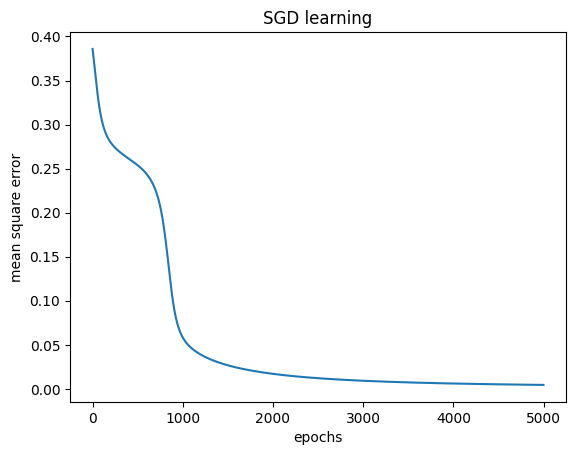

In [11]:
# plot learning curves
plt.figure(1)
plt.plot(range(num_epochs), err)
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.title('SGD learning')